<center> <h2> Avaliação AB2 - Sistemas de Controle 2 </h2> </center>

####Derek Nielsen Araújo Alves - 17212092
####Jadson César da Silva Santos - 18211019
####Matheus Ferreira Gêda - 18112339


In [ ]:
!pip install control

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import control
import warnings
warnings.filterwarnings("ignore")
import math

In [ ]:
A = np.array([[-1/2, 0, -1/2], [0, 0, -1/2], [1, 1, 0]]) # C=1, R=1, L=2
B = np.array([[0], [1/2], [0]]) # segunda entrada do sistema da atividade 1
C = np.array([[0, 0, 1]])
D = np.array([0])

Ts = 0.1

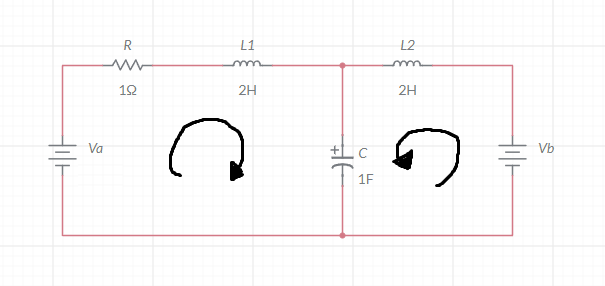

A seguir a função de transferência do circuito usado nas atividades:

In [ ]:
sys = signal.lti(A, B, C, D)
Gs = sys.to_tf()
control.tf(Gs.num, Gs.den)

TransferFunction(array([0.5 , 0.25]), array([1.  , 0.5 , 1.  , 0.25]))

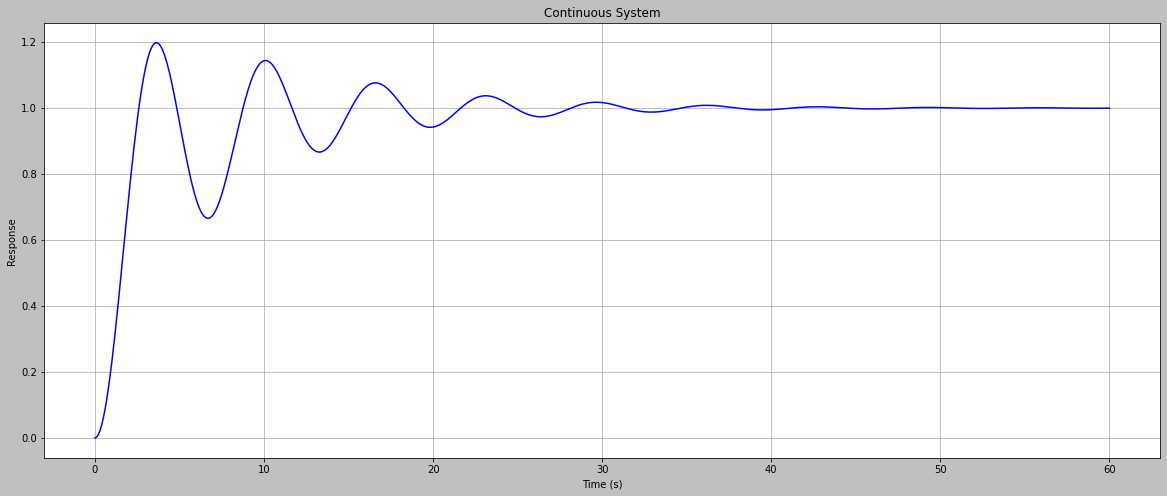

In [ ]:
sys = signal.lti(A, B, C, D)
y, x = sys.step(T=np.linspace(0, 60, 600))
plt.figure(figsize=(20, 8), facecolor="silver")
plt.grid()
plt.title("Continuous System")
plt.plot(y, x, c="blue")
plt.ylabel("Response")
plt.xlabel("Time (s)")
plt.show()

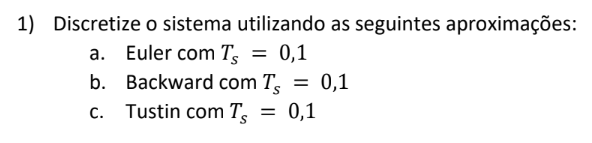

In [ ]:
def c2d_plot(A, B, C, D, Method, Ts, color, t, title):
  d_sys = signal.cont2discrete((A, B, C, D), Ts, Method)
  y, x = signal.dstep(d_sys, t=t)
  plt.figure(figsize=(20, 8), facecolor="silver")
  plt.grid()

  plt.title(title)
  plt.step(y, np.squeeze(x), label=Method, where='post', c=color)
  plt.ylabel("Response")
  plt.xlabel("Time (s)")
  plt.show()

Plotando a discretização utilizando o método de Tustin para $Ts = 0.1$

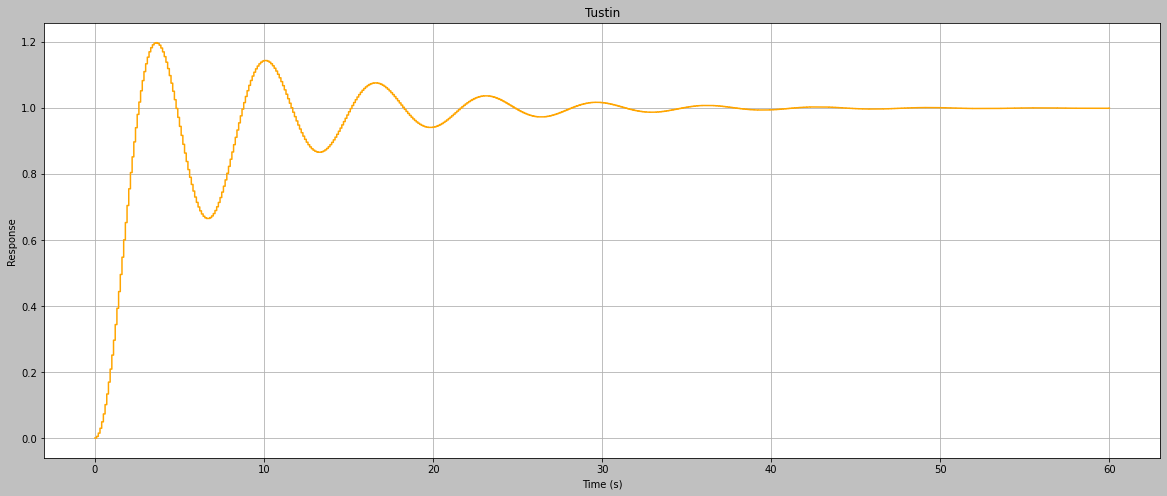

In [ ]:
c2d_plot(A, B, C, D, "bilinear", Ts, "orange", y, "Tustin")

Plotando a discretização utilizando o método de Euler para $Ts = 0.1$

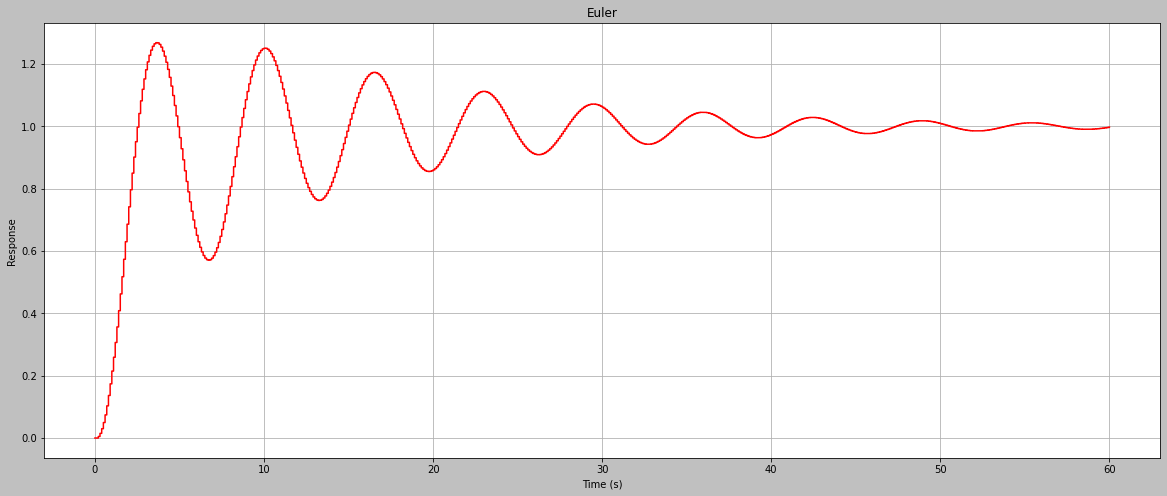

In [ ]:
c2d_plot(A, B, C, D, "euler", Ts, "red", y, "Euler")

Plotando a discretização utilizando o método de Backward para $Ts = 0.1$

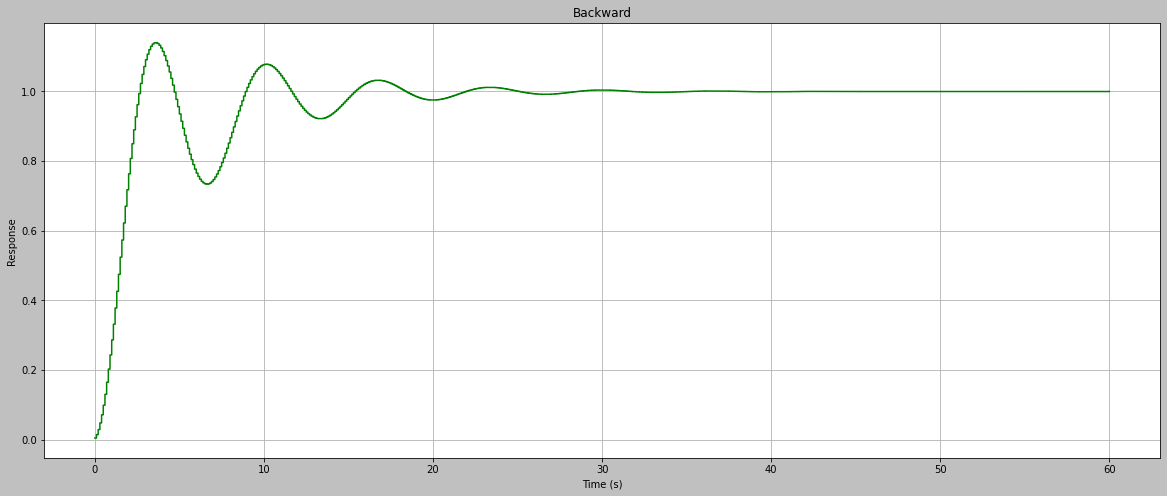

In [ ]:
c2d_plot(A, B, C, D, "backward_diff", Ts, "green", y, "Backward")

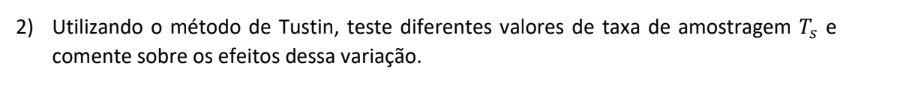

Plotando a discretização utilizando o método de Tustin para $Ts = 0.2$

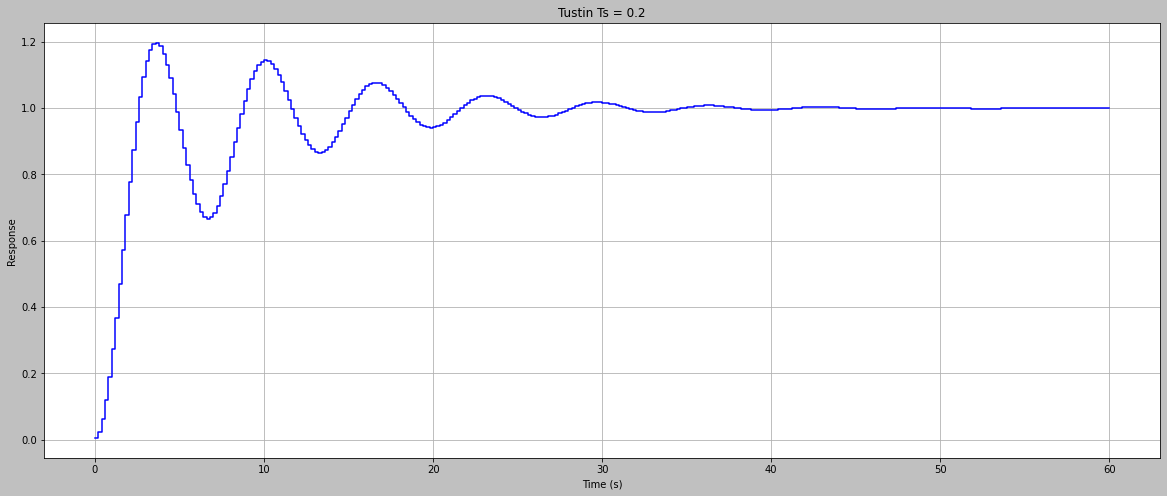

In [ ]:
Ts = 0.2
c2d_plot(A, B, C, D, "bilinear", Ts, "blue", y, "Tustin Ts = 0.2")

Plotando a discretização utilizando o método de Tustin para $Ts = 0.4$

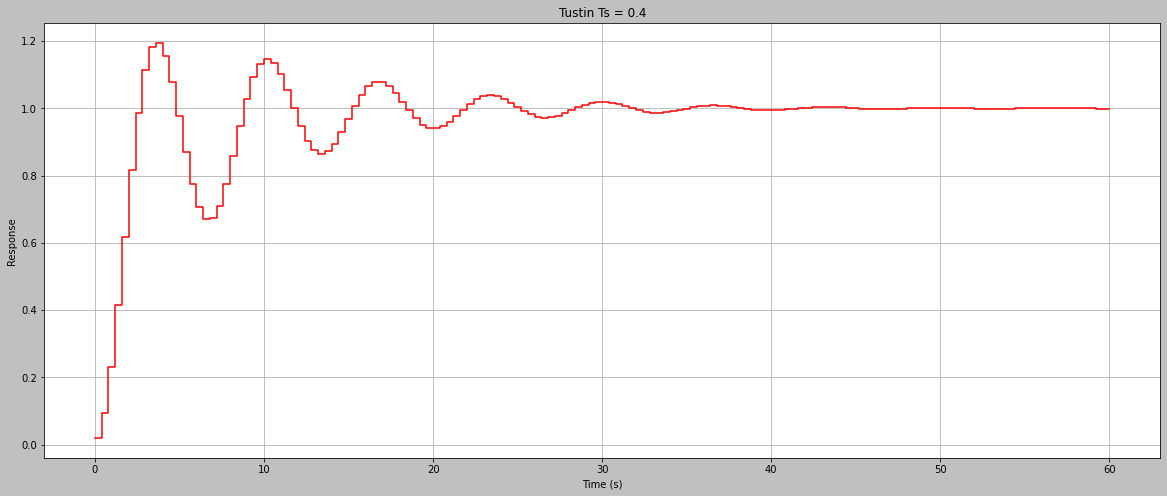

In [ ]:
Ts = 0.4
c2d_plot(A, B, C, D, "bilinear", Ts, "red", y, "Tustin Ts = 0.4")

Plotando a discretização utilizando o método de Tustin para $Ts = 0.8$

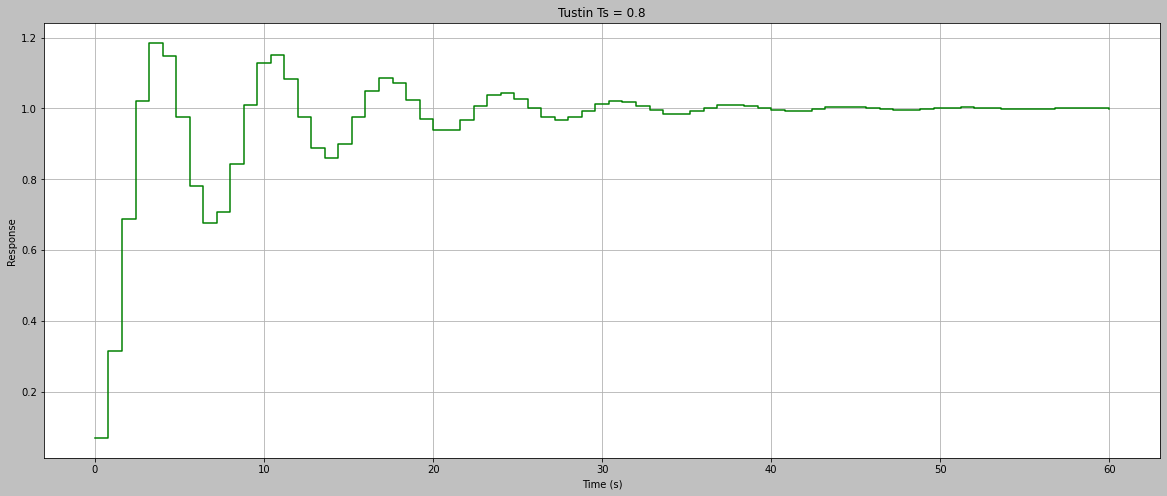

In [ ]:
Ts = 0.8
c2d_plot(A, B, C, D, "bilinear", Ts, "green", y, "Tustin Ts = 0.8")

Plotando a discretização utilizando o método de Tustin para $Ts = 1.6$

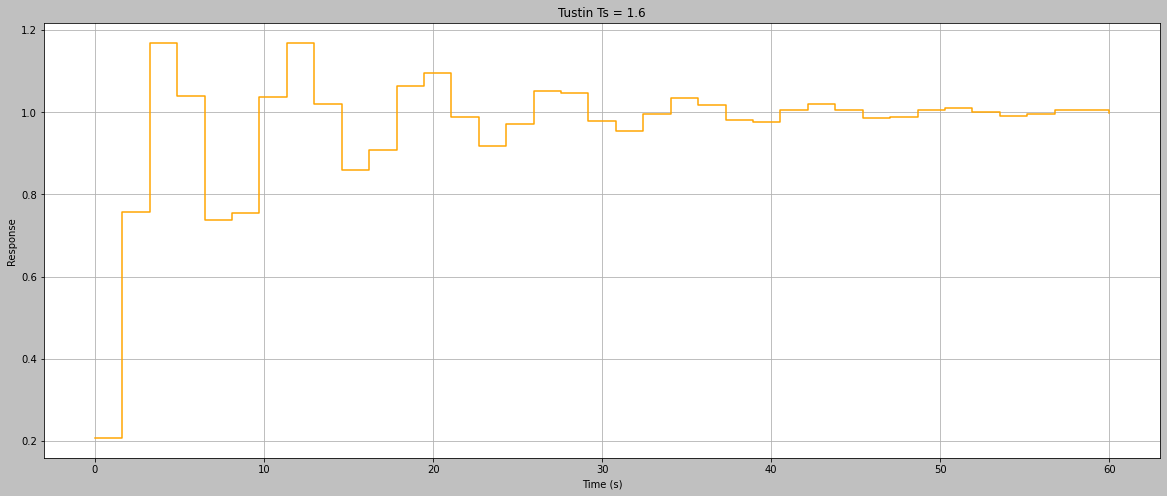

In [ ]:
Ts = 1.6
c2d_plot(A, B, C, D, "bilinear", Ts, "orange", y, "Tustin Ts = 1.6")

Podemos perceber que quanto maior o $Ts$, menor a quantidade de amostras, fazendo com que exista uma maior perda de informações e consequentemente a curva obtida apresenta maiores erros em comparação com valores menores para $Ts$. Portanto, quanto menor o $Ts$, a curva obtida na discretização será mais fiel a curva contínua.

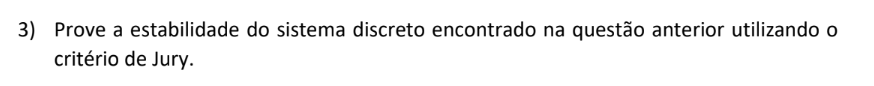

In [ ]:
def pv(p, v):
  a = []
  for i in range(len(p)):
    a.append(p[i] * pow(v, i))
  return sum(a)

def juryCriterion(p, ls) :
  n = len(p) - 1 # Grau do polinômio
  if pv(p, 1) <= 0:#Primeira condição
    print("1 condição não satisfeita! Sistema instável\n")
    return False
  if pow(-1, n) * pv(p, -1) <= 0: #Segunda condição
    print("2 condição não satisfeita! Sistema instável\n")
    return False
  if abs(p[0]) >= abs(p[-1]): #Terceira condição
    print("3 condição não satisfeita! Sistema instável\n")
    return False

  aux = p
  for i in range(n - 2):     
    nl = []
    for j in range(len(aux) - 1):
      #Calculando o determinante
      x0 = aux[0]
      xk = aux[j]
      xn = aux[-1]
      xnk = aux[-j -1]
      nl.append(x0 * xk - xn * xnk)
      
    aux = nl
    # se len(l) > 1, testamos a estabilidade
    if len(aux) > 1 :
        ls.append(aux)
        ls.append(aux[::-1])
        if abs(aux[0]) <= abs(aux[-1]):
          print(4+i, "condição não satisfeita! Sistema instável\n")
          return False
  return True

In [ ]:
def jury(method, strn, Dt):
  v = []
  d_sys = signal.cont2discrete((A, B, C, D), Dt, method=method)
  A_d, B_d, C_d, D_d = d_sys[0:4]

  sys = signal.StateSpace(A_d, B_d, C_d, D_d)
  Gs = sys.to_tf()
  g = control.tf(Gs.num, Gs.den, Dt)

  pol = g.den[0][0][::-1]
  v.append(pol)
  v.append(pol[::-1])

  if(juryCriterion(pol, v)):
    print("Sistema estável\nCritério de Jury para a discretização usando o método: ", strn)
    c = len(v[0])
    l = len(v)
    for i in range(int(l)): # completando com 0
      j = len(v[i])
      while j < c:
        v[i].append(0)
        j = j + 1
      print(v[i])
  return

In [ ]:
jury("bilinear", "Tustin", 0.1)

Sistema estável
Critério de Jury para a discretização usando o método:  Tustin
[-0.95127885  2.89294729 -2.94142514  1.        ]
[ 1.         -2.94142514  2.89294729 -0.95127885]
[-0.09506854183836799, 0.18942555172453313, -0.09483175915876663, 0]
[-0.09483175915876663, 0.18942555172453313, -0.09506854183836799, 0]


In [ ]:
jury("euler", "Euler", 0.1)

Sistema estável
Critério de Jury para a discretização usando o método:  Euler
[-0.95975  2.91    -2.95     1.     ]
[ 1.      -2.95     2.91    -0.95975]
[-0.078879937499999, 0.15712749999999787, -0.07873749999999902, 0]
[-0.07873749999999902, 0.15712749999999787, -0.078879937499999, 0]


In [ ]:
jury("backward_diff", "Backward", 0.1)

Sistema estável
Critério de Jury para a discretização usando o método:  Backward
[-0.94317378  2.87668003 -2.93327046  1.        ]
[ 1.         -2.93327046  2.87668003 -0.94317378]
[-0.11042322115640346, 0.22006127960837985, -0.11009624609163016, 0]
[-0.11009624609163016, 0.22006127960837985, -0.11042322115640346, 0]


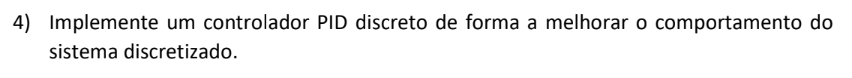

Obtendo a função de transferência para calcular o PID

In [ ]:
d_sys = signal.cont2discrete((A, B, C, D), 0.1, method="euler")
A_d, B_d, C_d, D_d = d_sys[0:4]

sys = signal.StateSpace(A_d, B_d, C_d, D_d)
Gs = sys.to_tf()
control.tf(Gs.num, Gs.den, 0.1)

TransferFunction(array([ 0.005  , -0.00475]), array([ 1.     , -2.95   ,  2.91   , -0.95975]), 0.1)

In [ ]:
def PID_Euler(A, B, C, D, tf, Kp, Kd, Ki, T):
  n = int(tf/T)+1
  v = np.linspace(0, tf, n)

  d_sys = signal.cont2discrete((A, B, C, D), 0.1, method="euler")
  A_d, B_d, C_d, D_d = d_sys[0:4]
  x, y = signal.dstep(d_sys, t=v)
  y = np.squeeze(y)

  r = [1 for i in range(n)]
  u = [0 for i in range(n)]
  e = np.linspace(0, tf, n)

  e[1:3] = r[1:3] - y[1:3]

  c1 = Kp + Kd/T
  c2 = Ki*T - 2*Kd/T - Kp
  c3 = Kd/T

  for k in range(3, n):
    x[k] = k*T
    y[k] = 2.95*y[k-1] + 0.005*u[k-2] - 2.91*y[k-2] - 0.00475*u[k-3] + 0.9598 * y[k-3]
    e[k] = r[k] - y[k]
    u[k] = u[k-1] + c1*e[k] + c2*e[k-1] + c3*e[k-2]

  plt.figure(figsize=(20, 8), facecolor="silver")
  plt.grid()
  plt.title(f"PID: Euler")
  plt.plot(x, y, c="blue")
  plt.ylabel("Response")
  plt.xlabel("Time (s)")
  plt.show()

  return x, y

Plotando o resultado obtido com controlador PID:



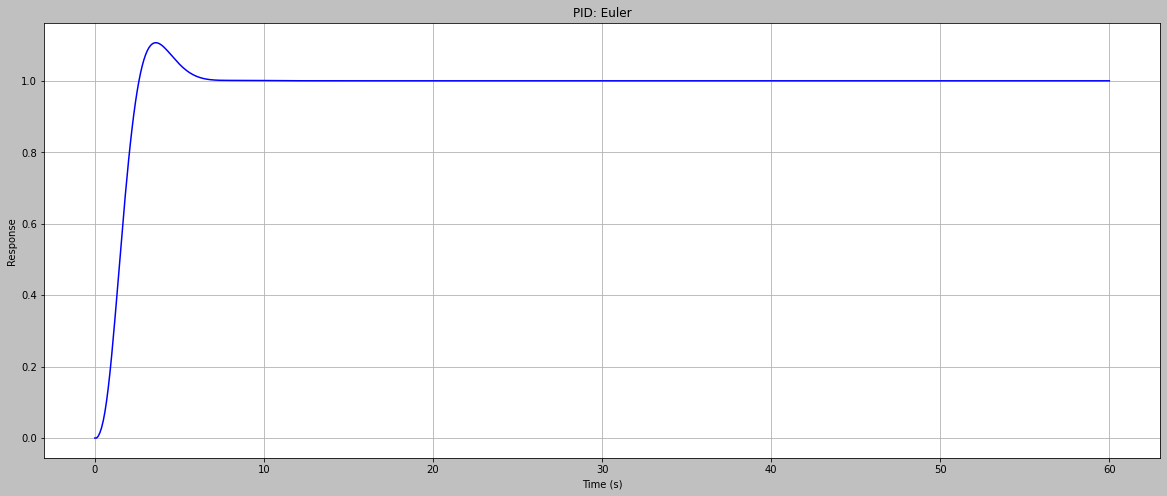

In [ ]:
xpid, ypid = PID_Euler(A, B, C, D, 60, 5, 5, 5, 0.1)

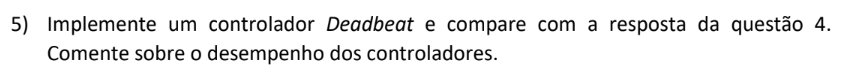

In [ ]:
def deadBeat(A, B, C, D, tf, T, method, strn):
  n = int(tf/T)+1
  v = np.linspace(0, tf, n)

  d_system = signal.cont2discrete((A, B,C, D), T, method="euler")
  A_discr, B_discr, C_discr, D_discr = d_system[:4]

  sys = signal.StateSpace(A, B, C, D)
  Gs = sys.to_tf()
  Gz = control.tf(Gs.num, Gs.den, 0.1)

  Tz = control.tf([1], [1,0,0,-1], 0.1)

  Dz = 1/Gz*Tz
  Gcl = Dz * Gz / (1 + Dz*Gz)
  t, y = control.step_response(Gcl)

  plt.figure(figsize=(20, 8), facecolor="silver")
  plt.grid()
  plt.title(f"Deadbeat: {strn}")
  plt.plot(v, y[0:n], c="blue")
  plt.ylabel("Response")
  plt.xlabel("Time (s)")
  plt.show()

  return v, y[0:n]

Plotando o resultado obtido para o Deadbeat:

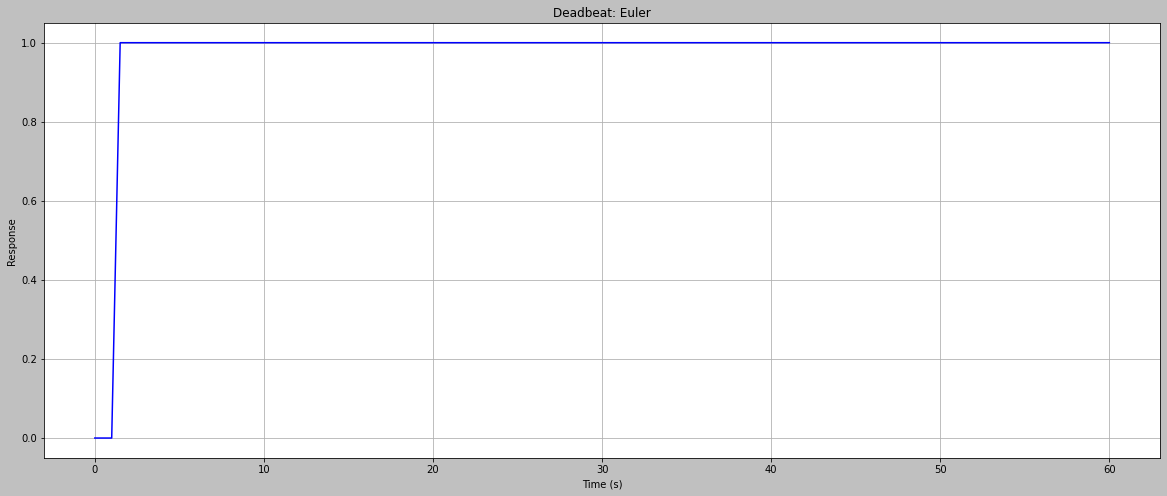

In [ ]:
xdb, ydb = deadBeat(A, B, C, D, 60, 0.5, "euler", "Euler")

Plotando comparativo entre PID e Deadbeat

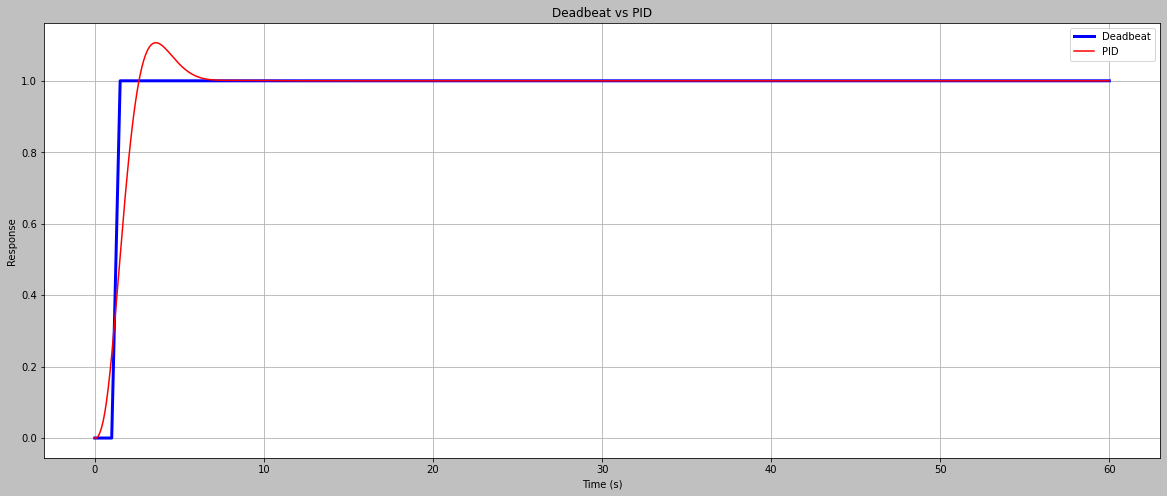

In [ ]:
plt.figure(figsize=(20, 8), facecolor="silver")
plt.grid()
plt.title("Deadbeat vs PID")
plt.plot(xdb, ydb, c="blue", label='Deadbeat', lw=3)
plt.plot(xpid, ypid, c="red", label='PID')
plt.legend()
plt.ylabel("Response")
plt.xlabel("Time (s)")
plt.show()

COMENTÁRIO COMPARATIVO PID x DeadBeat

Podemos observar que dada a característica do controlador PID que visa diminuir o erro fornecendo precisão e estabilidade para que o sistema apresente um comportamento esperado utilizando técnicas de integração e derivação, de modo contrário o Deadbeat e sua natureza discreta trabalha para atingir o valor de referência.

O controlador PID apresenta um overshoot e se estabiliza em torno de 7 segundos para os valores utilizados de $Kp$, $Ki$ e $Kd$, já o controlador Deadbeat utilizado se estabiliza em cerca de 1s.